<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this course!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lesson notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file
%matplotlib inline

# this line makes plots prettier on mac retina screens - if you don't have one it shouldn't do anything
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
#opening file   
with open('sat_scores.csv', mode='r') as inp:
    #passing file to the variable as a list of lists (each list is a row)
    rowslist  = [line for line in csv.reader(inp)]
    #creating header and removing it from the overall list
    header = rowslist.pop(0)
    data = {}
    #assigning column values by iterating through the header (using enumerate to keep track of index)
    for i,key in enumerate(header):
        #appending, and converting type appropriately, iterating through each row in the list
        ilist = [int(row[i]) if row[i].isnumeric() == True else row[i] for row in rowslist]
        data.update({key: ilist})

#testing
data['State'][:4]

['CT', 'NJ', 'MA', 'NY']

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [3]:
df_fromdict = pd.DataFrame(data)
df_fromdict.head()

State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516

In [4]:
#no difference, because I have converted numerical values to int
df_fromdict.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [5]:
df = pd.read_csv('sat_scores.csv')
df.head()

State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516

In [6]:
df.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [7]:
#rate seems to be the rate of participation for the SAT test
#verbal is the grade for the reading and writing portion
#math for the maths portion
df.head(10)

State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516
5    RI    71     501   499
6    PA    71     500   499
7    VT    69     511   506
8    ME    69     506   500
9    VA    68     510   501

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   52 non-null     object
 1   Rate    52 non-null     int64 
 2   Verbal  52 non-null     int64 
 3   Math    52 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.8+ KB


In [9]:
#creating data dictionary as a dataframe
data_dictionary = pd.DataFrame({'Type': ['object','integer', 'integer', 'integer'],
                               'Description': ['2 letters state abbreviations','Rate of participation in SAT test', 'Grade in reading and writing', 'Grade in maths'],
                               'Shape': '52 entries, none null'},
                               index = ['State','Rate','Verbal','Math'])
#setting a caption
data_dictionary = data_dictionary.style.set_caption('Data dictionary for SAT scores dataset')

In [10]:
#setting index name as 'columns' to point out that indexes are column names of the SAT scores dataframe
data_dictionary.index.name = 'Columns'
data_dictionary

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `histplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `histplot` documentation to learn about the arguments and fine-tune your chart if you want.](http://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot)

In [11]:
df.columns

Index(['State', 'Rate', 'Verbal', 'Math'], dtype='object')

<AxesSubplot:ylabel='Count'>

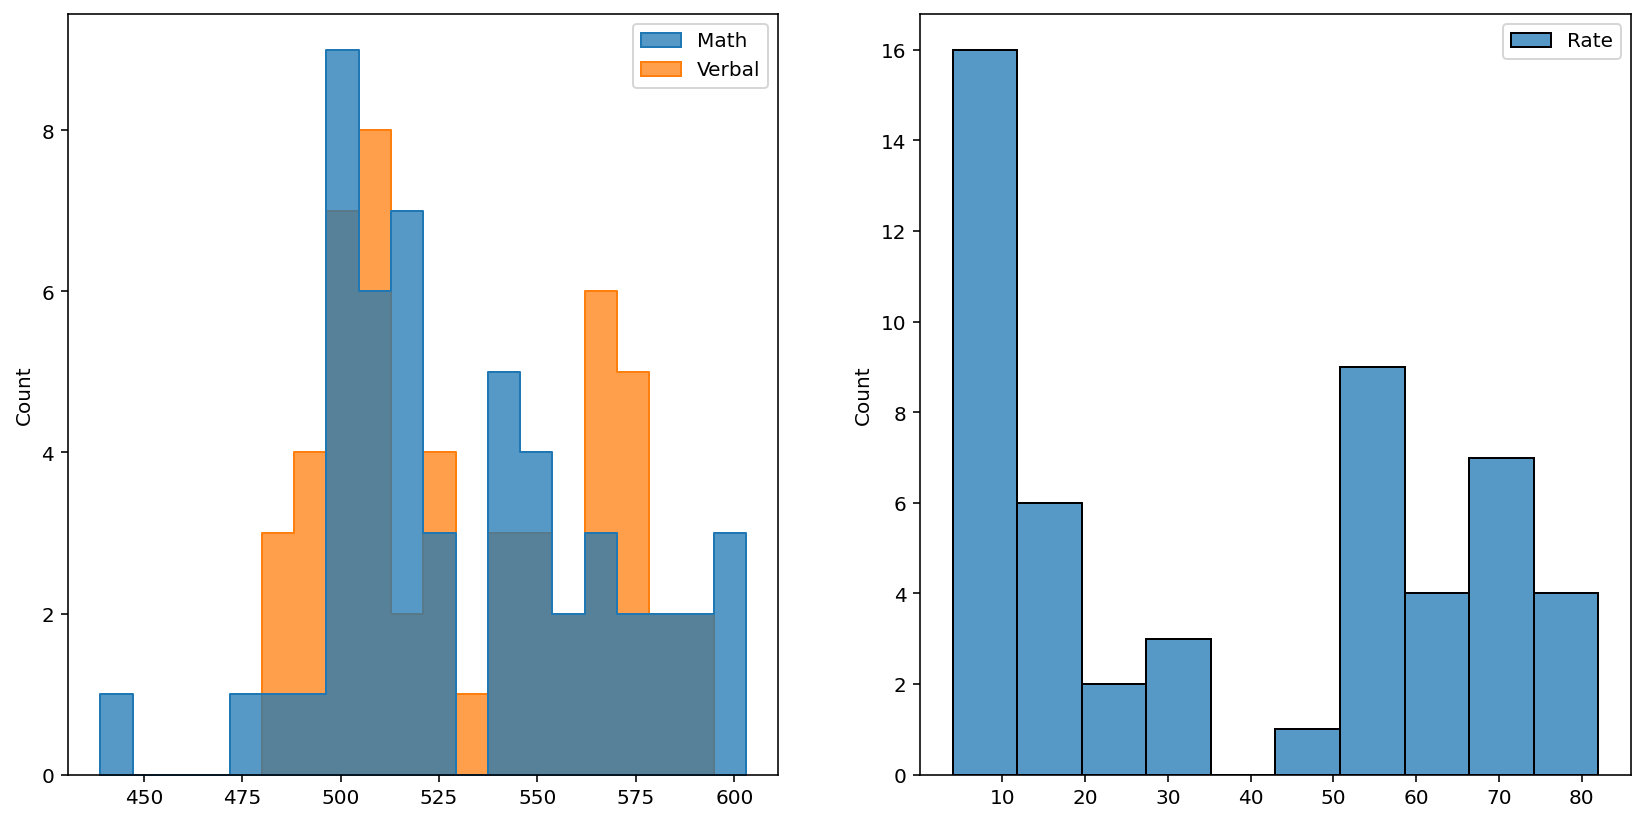

In [12]:
fig, ax = plt.subplots(ncols =2,figsize = (14,7))
sns.histplot(ax=ax[0], data = df[['Math','Verbal']], element="step", kde = False, bins = 20)
sns.histplot(ax=ax[1], data = df[['Rate']], kde = False, bins = 10)
sns.histplot()

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

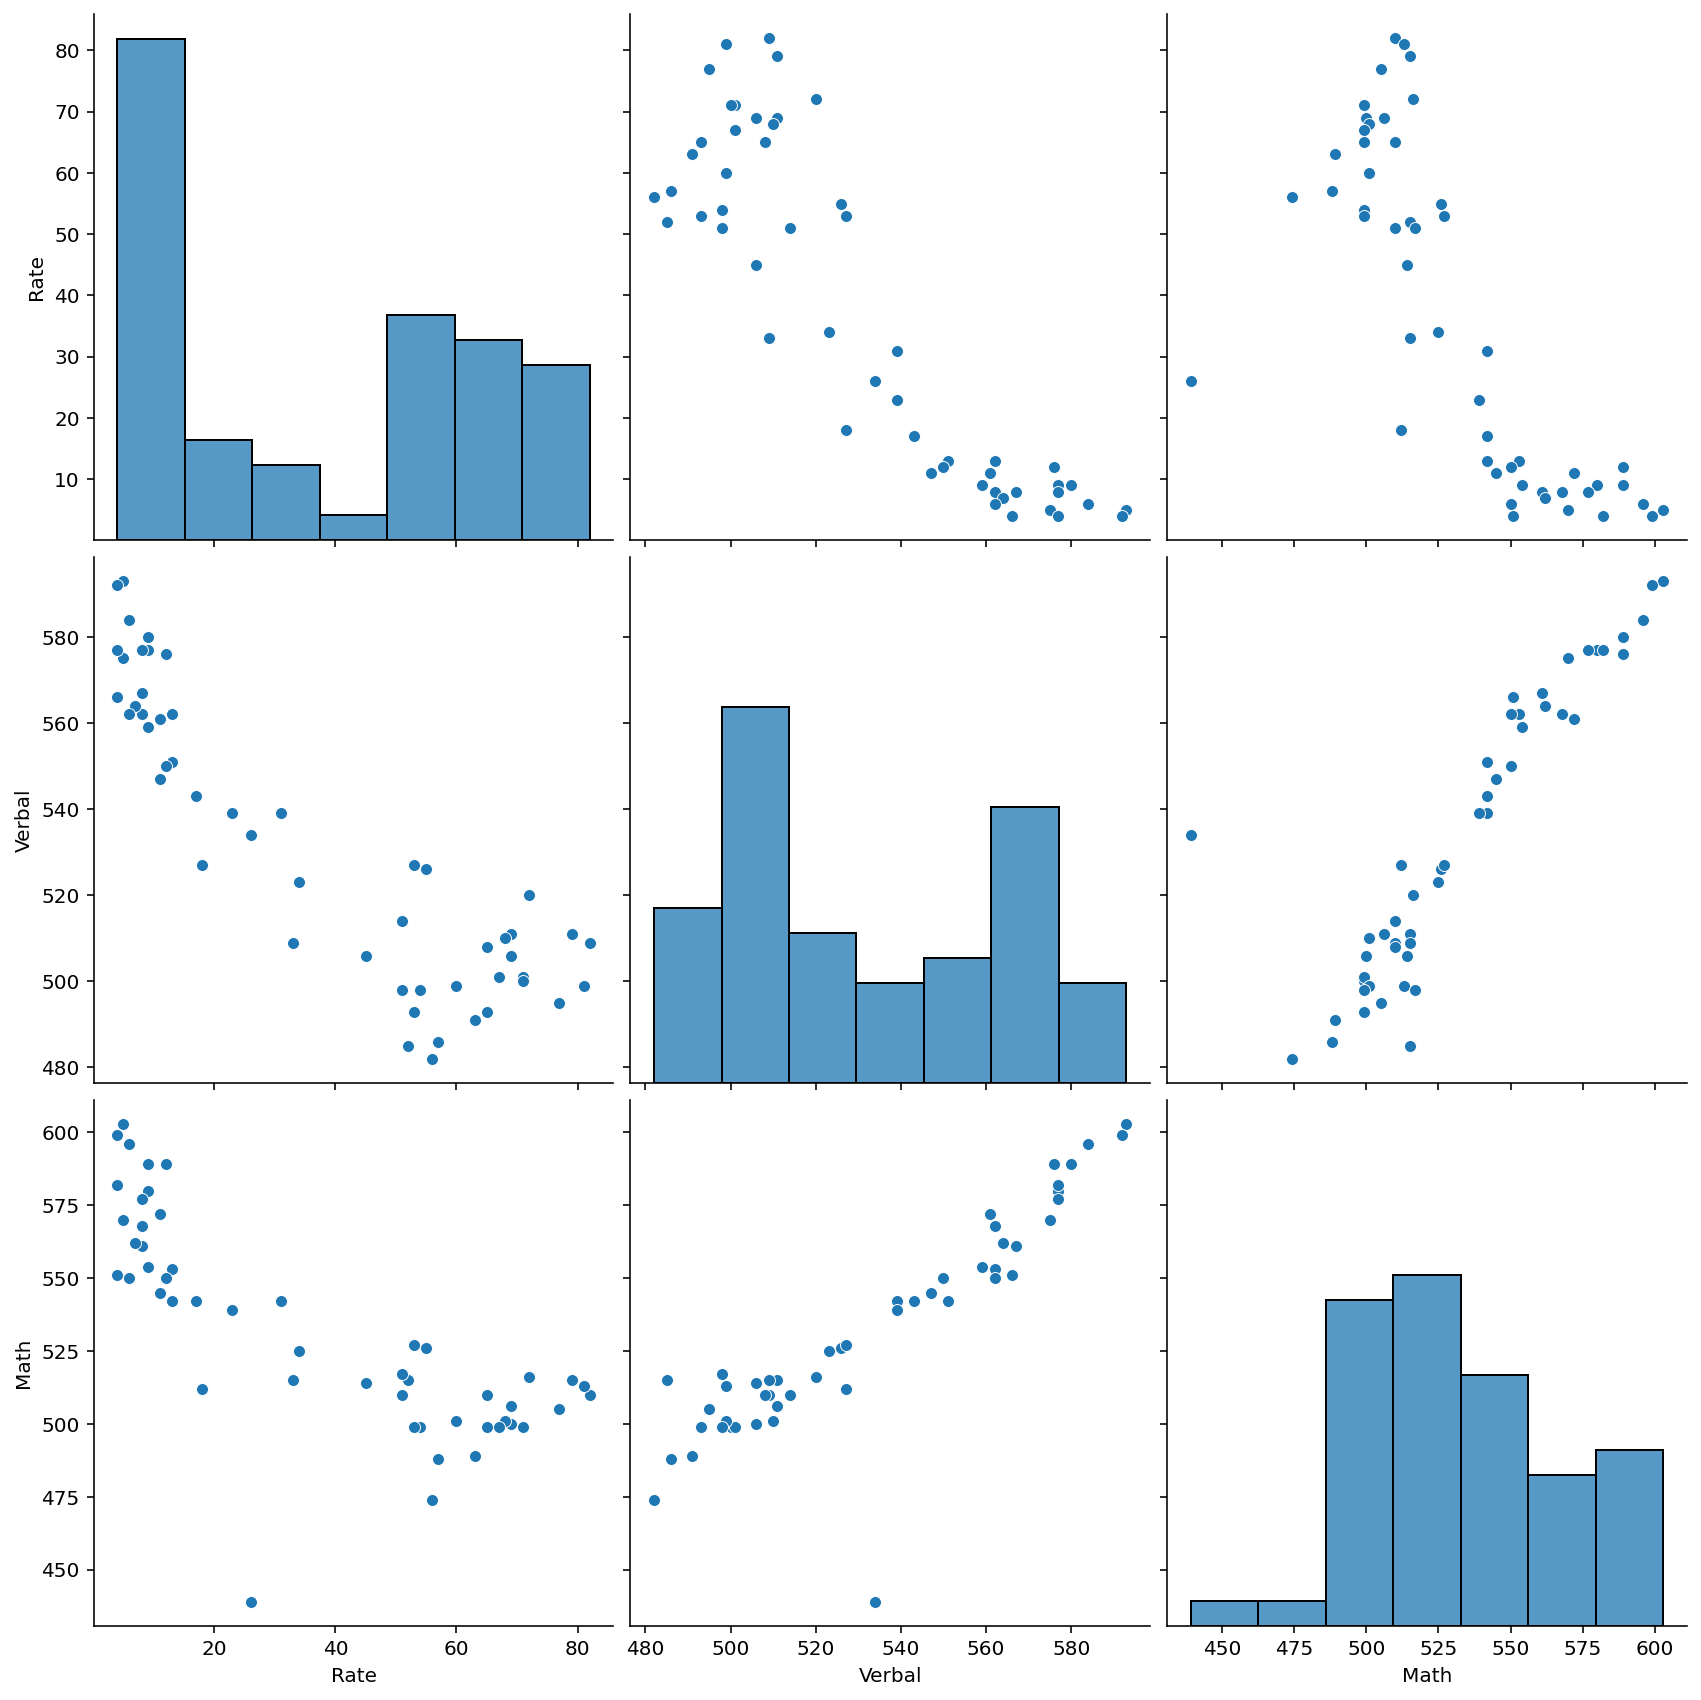

In [13]:
#The scatter plots show a quite strong negative relationship between rate and both verbal and math
#Verbal and math also seem to be related to each other quite strongly, with a positive relationship
#Distributions:
#- rate looks skewed to the right with most of the data lying within the first bin on the left
#- verbal has 2 main peaks, rensembles a multimodal distribution
#- math is skewed to the right
sns.pairplot(data = df,height = 4)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

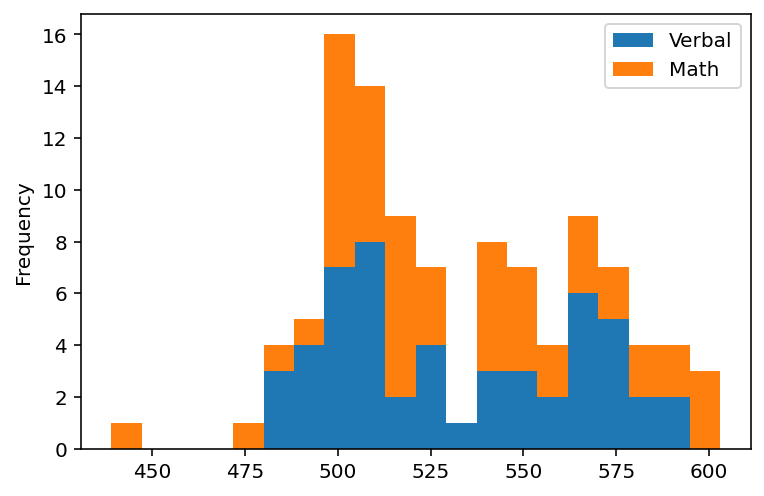

In [14]:
df[['Verbal','Math']].plot.hist(stacked=True, bins=20)
plt.show()

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

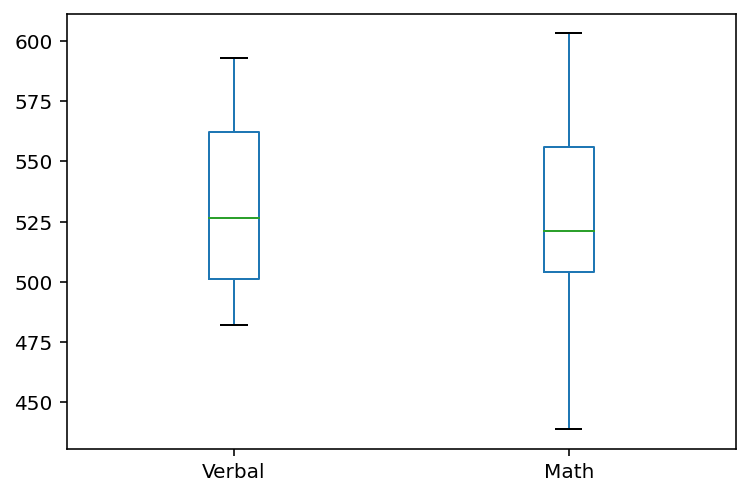

In [15]:
#Boxplots show multiple pieces of useful information on the same plot (median, IQR, whiskers and outliers).
#Histograms show the frequency of the bins appearing within the data
#Scatter plots are used to plot a variables against another to visualize the relationship between the two

df[['Verbal','Math']].plot.box()
plt.show()

#The issue of plotting rate with the other variable would be the difference in units of measurement

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [16]:
#By standardizing the data (setting mean = 0 and standard deviation = 1) the data in all variables is expressed as distance
#from the mean, rather than the original units.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standard = pd.DataFrame(scaler.fit_transform(df[['Rate','Verbal','Math']]), columns = ['Rate','Verbal','Math'])
df_standard.index.name = 'Standard deviations'

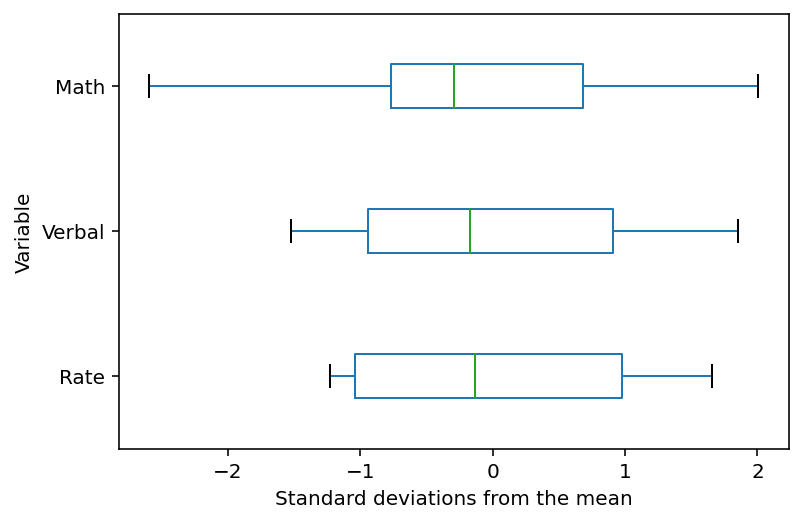

In [17]:
df_standard.plot.box(vert=False,sym="r+")
plt.xlabel("Standard deviations from the mean")
plt.ylabel("Variable")
plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [18]:
df.columns

Index(['State', 'Rate', 'Verbal', 'Math'], dtype='object')

In [19]:
#creating mask
mask_verbal_mean =(df['Verbal'] > df.Verbal.mean())

In [20]:
#filtering by the mask, showing only the State column, has 24 values
df[mask_verbal_mean].loc[:]['State'].shape

(24,)

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [21]:
#creating mask
mask_verbal_median =(df['Verbal'] > df.Verbal.median())

In [22]:
#there are 26 states with verbal scores above the median, because the median is lower than the mean due to the positive skew
df[mask_verbal_median].loc[:]['State'].shape

(26,)

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [23]:
df['Difference'] = df['Verbal'] - df['Math']
df.head()

State  Rate  Verbal  Math  Difference
0    CT    82     509   510          -1
1    NJ    81     499   513         -14
2    MA    79     511   515          -4
3    NY    77     495   505         -10
4    NH    72     520   516           4

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [24]:
df_topverbaldifference = df.sort_values(by = 'Difference', ascending = False).iloc[:10][['State','Difference']]
df_topverbaldifference.head(3)

State  Difference
27    OH          95
50    MS          15
29    WV          15

In [25]:
df_topmathdifference = df.sort_values(by = 'Difference', ascending = True).iloc[:10][['State','Difference']]
df_topmathdifference.head(3)

State  Difference
21    HI         -30
23    CA         -19
1     NJ         -14

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [26]:
#the correlation matrix confirms the correlations outlined by the scatter plots
#rate has strong negative relationships with verbal and math
#verbal and math are strongly positively related
#the new variable difference has very slight negative relatioship with rate and math and very weak positive with verbal
df.drop('State', axis =1).corr()

Rate    Verbal      Math  Difference
Rate        1.000000 -0.886432 -0.773746   -0.101412
Verbal     -0.886432  1.000000  0.899871    0.052600
Math       -0.773746  0.899871  1.000000   -0.388219
Difference -0.101412  0.052600 -0.388219    1.000000

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [27]:
#count = number of rows in the column
#mean = arithmetic mean
#std = standard deviation
#min = lowest value in the range / max = highest value in the range
#25% = 25th percentile / 50% = median / 75% = 75th percentile
df.describe()

Rate      Verbal        Math  Difference
count  52.000000   52.000000   52.000000   52.000000
mean   37.153846  532.019231  531.500000    0.519231
std    27.301788   33.236225   36.014975   15.729939
min     4.000000  482.000000  439.000000  -30.000000
25%     9.000000  501.000000  504.000000   -6.000000
50%    33.500000  526.500000  521.000000    0.000000
75%    63.500000  562.000000  555.750000    4.250000
max    82.000000  593.000000  603.000000   95.000000

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [28]:
#similarly to correlation, covariance is a measure of the relationship between variables
#correlation is more useful because it is the a scaled version of covariance (it ranges from -1 to +1)
#to convert the covariance to correlation the covariance of x * y is divided by standard deviation
#(sum((xi - xbar) * (yi - ybar))) / (sqrt(sum(xi-xbar)^2*sum(yi-ybar)^2))
df.cov()

Rate       Verbal         Math  Difference
Rate        745.387632  -804.355958  -760.803922  -43.552036
Verbal     -804.355958  1104.646682  1077.147059   27.499623
Math       -760.803922  1077.147059  1297.078431 -219.931373
Difference  -43.552036    27.499623  -219.931373  247.430995

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1 Load the data using pandas. 

Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [29]:
# there seem to be multiple entries with a '-' instead of a float
drug = pd.read_csv('drug-use-by-age.csv')
drug.head(10)

age     n  alcohol-use  alcohol-frequency  marijuana-use  \
0  12  2798          3.9                3.0            1.1   
1  13  2757          8.5                6.0            3.4   
2  14  2792         18.1                5.0            8.7   
3  15  2956         29.2                6.0           14.5   
4  16  3058         40.1               10.0           22.5   
5  17  3038         49.3               13.0           28.0   
6  18  2469         58.7               24.0           33.7   
7  19  2223         64.6               36.0           33.4   
8  20  2271         69.7               48.0           34.0   
9  21  2354         83.2               52.0           33.0   

   marijuana-frequency  cocaine-use cocaine-frequency  crack-use  \
0                  4.0          0.1               5.0        0.0   
1                 15.0          0.1               1.0        0.0   
2                 24.0          0.1               5.5        0.0   
3                 25.0          0.5               4.0        0.1   
4                 30.0          1.0               7.0        0.0   
5                 36.0          2.0               5.0        0.1   
6                 52.0          3.2               5.0        0.4   
7                 60.0          4.1               5.5        0.5   
8                 60.0          4.9               8.0        0.6   
9                 52.0          4.8               5.0        0.5   

  crack-frequency  ...  oxycontin-use oxycontin-frequency  tranquilizer-use  \
0               -  ...            0.1                24.5               0.2   
1             3.0  ...            0.1                41.0               0.3   
2               -  ...            0.4                 4.5               0.9   
3             9.5  ...            0.8                 3.0               2.0   
4             1.0  ...            1.1                 4.0               2.4   
5            21.0  ...            1.4                 6.0               3.5   
6            10.0  ...            1.7                 7.0               4.9   
7             2.0  ...            1.5                 7.5               4.2   
8             5.0  ...            1.7                12.0               5.4   
9            17.0  ...            1.3                13.5               3.9   

   tranquilizer-frequency  stimulant-use stimulant-frequency  meth-use  \
0                    52.0            0.2                 2.0       0.0   
1                    25.5            0.3                 4.0       0.1   
2                     5.0            0.8                12.0       0.1   
3                     4.5            1.5                 6.0       0.3   
4                    11.0            1.8                 9.5       0.3   
5                     7.0            2.8                 9.0       0.6   
6                    12.0            3.0                 8.0       0.5   
7                     4.5            3.3                 6.0       0.4   
8                    10.0            4.0                12.0       0.9   
9                     7.0            4.1                10.0       0.6   

   meth-frequency  sedative-use sedative-frequency  
0               -           0.2               13.0  
1             5.0           0.1               19.0  
2            24.0           0.2               16.5  
3            10.5           0.4               30.0  
4            36.0           0.2                3.0  
5            48.0           0.5                6.5  
6            12.0           0.4               10.0  
7           105.0           0.3                6.0  
8            12.0           0.5                4.0  
9             2.0           0.3                9.0  

[10 rows x 28 columns]

In [30]:
#there are no NaN values
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      17 non-null     object 
 1   n                        17 non-null     int64  
 2   alcohol-use              17 non-null     float64
 3   alcohol-frequency        17 non-null     float64
 4   marijuana-use            17 non-null     float64
 5   marijuana-frequency      17 non-null     float64
 6   cocaine-use              17 non-null     float64
 7   cocaine-frequency        17 non-null     object 
 8   crack-use                17 non-null     float64
 9   crack-frequency          17 non-null     object 
 10  heroin-use               17 non-null     float64
 11  heroin-frequency         17 non-null     object 
 12  hallucinogen-use         17 non-null     float64
 13  hallucinogen-frequency   17 non-null     float64
 14  inhalant-use             17 

In [31]:
#age is recorded as years 12 to 21, then groups of age
drug.age.unique()

array(['12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22-23', '24-25', '26-29', '30-34', '35-49', '50-64', '65+'],
      dtype=object)

In [32]:
drug.columns

Index(['age', 'n', 'alcohol-use', 'alcohol-frequency', 'marijuana-use',
       'marijuana-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use',
       'crack-frequency', 'heroin-use', 'heroin-frequency', 'hallucinogen-use',
       'hallucinogen-frequency', 'inhalant-use', 'inhalant-frequency',
       'pain-releiver-use', 'pain-releiver-frequency', 'oxycontin-use',
       'oxycontin-frequency', 'tranquilizer-use', 'tranquilizer-frequency',
       'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency',
       'sedative-use', 'sedative-frequency'],
      dtype='object')

In [33]:
#the frequency indicates the median number of times a user in the age group used the type of drug
#therefore replacing all the '-' in the dataset (except on age and n columns) with 0 and making sure they are all floats

dfslice = ['alcohol-use', 'alcohol-frequency', 'marijuana-use',
       'marijuana-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use',
       'crack-frequency', 'heroin-use', 'heroin-frequency', 'hallucinogen-use',
       'hallucinogen-frequency', 'inhalant-use', 'inhalant-frequency',
       'pain-releiver-use', 'pain-releiver-frequency', 'oxycontin-use',
       'oxycontin-frequency', 'tranquilizer-use', 'tranquilizer-frequency',
       'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency',
       'sedative-use', 'sedative-frequency']
def fixdf(x):
    if x == '-':
        return 0.0
    else:
        return float(x)

drug2 = drug[dfslice].applymap(fixdf)

In [34]:
drug2.head()

alcohol-use  alcohol-frequency  marijuana-use  marijuana-frequency  \
0          3.9                3.0            1.1                  4.0   
1          8.5                6.0            3.4                 15.0   
2         18.1                5.0            8.7                 24.0   
3         29.2                6.0           14.5                 25.0   
4         40.1               10.0           22.5                 30.0   

   cocaine-use  cocaine-frequency  crack-use  crack-frequency  heroin-use  \
0          0.1                5.0        0.0              0.0         0.1   
1          0.1                1.0        0.0              3.0         0.0   
2          0.1                5.5        0.0              0.0         0.1   
3          0.5                4.0        0.1              9.5         0.2   
4          1.0                7.0        0.0              1.0         0.1   

   heroin-frequency  ...  oxycontin-use  oxycontin-frequency  \
0              35.5  ...            0.1                 24.5   
1               0.0  ...            0.1                 41.0   
2               2.0  ...            0.4                  4.5   
3               1.0  ...            0.8                  3.0   
4              66.5  ...            1.1                  4.0   

   tranquilizer-use  tranquilizer-frequency  stimulant-use  \
0               0.2                    52.0            0.2   
1               0.3                    25.5            0.3   
2               0.9                     5.0            0.8   
3               2.0                     4.5            1.5   
4               2.4                    11.0            1.8   

   stimulant-frequency  meth-use  meth-frequency  sedative-use  \
0                  2.0       0.0             0.0           0.2   
1                  4.0       0.1             5.0           0.1   
2                 12.0       0.1            24.0           0.2   
3                  6.0       0.3            10.5           0.4   
4                  9.5       0.3            36.0           0.2   

   sedative-frequency  
0                13.0  
1                19.0  
2                16.5  
3                30.0  
4                 3.0  

[5 rows x 26 columns]

In [35]:
drug2.dtypes

alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency          float64
crack-use                  float64
crack-frequency            float64
heroin-use                 float64
heroin-frequency           float64
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency         float64
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency        float64
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency             float64
sedative-use               float64
sedative-frequency         float64
dtype: object

In [36]:
#merging back the 2 columns (age and n)
drug = pd.concat([drug[['age','n']],drug2],axis =1)
drug.head()

age     n  alcohol-use  alcohol-frequency  marijuana-use  \
0  12  2798          3.9                3.0            1.1   
1  13  2757          8.5                6.0            3.4   
2  14  2792         18.1                5.0            8.7   
3  15  2956         29.2                6.0           14.5   
4  16  3058         40.1               10.0           22.5   

   marijuana-frequency  cocaine-use  cocaine-frequency  crack-use  \
0                  4.0          0.1                5.0        0.0   
1                 15.0          0.1                1.0        0.0   
2                 24.0          0.1                5.5        0.0   
3                 25.0          0.5                4.0        0.1   
4                 30.0          1.0                7.0        0.0   

   crack-frequency  ...  oxycontin-use  oxycontin-frequency  tranquilizer-use  \
0              0.0  ...            0.1                 24.5               0.2   
1              3.0  ...            0.1                 41.0               0.3   
2              0.0  ...            0.4                  4.5               0.9   
3              9.5  ...            0.8                  3.0               2.0   
4              1.0  ...            1.1                  4.0               2.4   

   tranquilizer-frequency  stimulant-use  stimulant-frequency  meth-use  \
0                    52.0            0.2                  2.0       0.0   
1                    25.5            0.3                  4.0       0.1   
2                     5.0            0.8                 12.0       0.1   
3                     4.5            1.5                  6.0       0.3   
4                    11.0            1.8                  9.5       0.3   

   meth-frequency  sedative-use  sedative-frequency  
0             0.0           0.2                13.0  
1             5.0           0.1                19.0  
2            24.0           0.2                16.5  
3            10.5           0.4                30.0  
4            36.0           0.2                 3.0  

[5 rows x 28 columns]

In [37]:
#there do not seem to be inconsistencies in the data as per the descriptive statistics
drug.describe()

n  alcohol-use  alcohol-frequency  marijuana-use  \
count    17.000000    17.000000          17.000000      17.000000   
mean   3251.058824    55.429412          33.352941      18.923529   
std    1297.890426    26.878866          21.318833      11.959752   
min    2223.000000     3.900000           3.000000       1.100000   
25%    2469.000000    40.100000          10.000000       8.700000   
50%    2798.000000    64.600000          48.000000      20.800000   
75%    3058.000000    77.500000          52.000000      28.400000   
max    7391.000000    84.200000          52.000000      34.000000   

       marijuana-frequency  cocaine-use  cocaine-frequency  crack-use  \
count            17.000000    17.000000          17.000000  17.000000   
mean             42.941176     2.176471           7.411765   0.294118   
std              18.362566     1.816772           8.014119   0.235772   
min               4.000000     0.000000           0.000000   0.000000   
25%              30.000000     0.500000           5.000000   0.000000   
50%              52.000000     2.000000           5.000000   0.400000   
75%              52.000000     4.000000           7.000000   0.500000   
max              72.000000     4.900000          36.000000   0.600000   

       crack-frequency  heroin-use  ...  oxycontin-use  oxycontin-frequency  \
count        17.000000   17.000000  ...      17.000000            17.000000   
mean         12.382353    0.352941  ...       0.935294            13.941176   
std          17.361532    0.333762  ...       0.608216            12.902134   
min           0.000000    0.000000  ...       0.000000             0.000000   
25%           2.000000    0.100000  ...       0.400000             5.000000   
50%           6.000000    0.200000  ...       1.100000            12.000000   
75%          15.000000    0.600000  ...       1.400000            17.500000   
max          62.000000    1.100000  ...       1.700000            46.000000   

       tranquilizer-use  tranquilizer-frequency  stimulant-use  \
count         17.000000               17.000000      17.000000   
mean           2.805882               11.735294       1.917647   
std            1.753379               11.485205       1.407673   
min            0.200000                4.500000       0.000000   
25%            1.400000                6.000000       0.600000   
50%            3.500000               10.000000       1.800000   
75%            4.200000               11.000000       3.000000   
max            5.400000               52.000000       4.100000   

       stimulant-frequency   meth-use  meth-frequency  sedative-use  \
count            17.000000  17.000000       17.000000     17.000000   
mean             31.147059   0.382353       31.735294      0.282353   
std              85.973790   0.262762       32.206423      0.138000   
min               2.000000   0.000000        0.000000      0.000000   
25%               7.000000   0.200000       10.500000      0.200000   
50%              10.000000   0.400000       24.000000      0.300000   
75%              12.000000   0.600000       46.000000      0.400000   
max             364.000000   0.900000      105.000000      0.500000   

       sedative-frequency  
count           17.000000  
mean            19.382353  
std             24.833527  
min              3.000000  
25%              6.500000  
50%             10.000000  
75%             17.500000  
max            104.000000  

[8 rows x 27 columns]

In [38]:
drug

age     n  alcohol-use  alcohol-frequency  marijuana-use  \
0      12  2798          3.9                3.0            1.1   
1      13  2757          8.5                6.0            3.4   
2      14  2792         18.1                5.0            8.7   
3      15  2956         29.2                6.0           14.5   
4      16  3058         40.1               10.0           22.5   
5      17  3038         49.3               13.0           28.0   
6      18  2469         58.7               24.0           33.7   
7      19  2223         64.6               36.0           33.4   
8      20  2271         69.7               48.0           34.0   
9      21  2354         83.2               52.0           33.0   
10  22-23  4707         84.2               52.0           28.4   
11  24-25  4591         83.1               52.0           24.9   
12  26-29  2628         80.7               52.0           20.8   
13  30-34  2864         77.5               52.0           16.4   
14  35-49  7391         75.0               52.0           10.4   
15  50-64  3923         67.2               52.0            7.3   
16    65+  2448         49.3               52.0            1.2   

    marijuana-frequency  cocaine-use  cocaine-frequency  crack-use  \
0                   4.0          0.1                5.0        0.0   
1                  15.0          0.1                1.0        0.0   
2                  24.0          0.1                5.5        0.0   
3                  25.0          0.5                4.0        0.1   
4                  30.0          1.0                7.0        0.0   
5                  36.0          2.0                5.0        0.1   
6                  52.0          3.2                5.0        0.4   
7                  60.0          4.1                5.5        0.5   
8                  60.0          4.9                8.0        0.6   
9                  52.0          4.8                5.0        0.5   
10                 52.0          4.5                5.0        0.5   
11                 60.0          4.0                6.0        0.5   
12                 52.0          3.2                5.0        0.4   
13                 72.0          2.1                8.0        0.5   
14                 48.0          1.5               15.0        0.5   
15                 52.0          0.9               36.0        0.4   
16                 36.0          0.0                0.0        0.0   

    crack-frequency  ...  oxycontin-use  oxycontin-frequency  \
0               0.0  ...            0.1                 24.5   
1               3.0  ...            0.1                 41.0   
2               0.0  ...            0.4                  4.5   
3               9.5  ...            0.8                  3.0   
4               1.0  ...            1.1                  4.0   
5              21.0  ...            1.4                  6.0   
6              10.0  ...            1.7                  7.0   
7               2.0  ...            1.5                  7.5   
8               5.0  ...            1.7                 12.0   
9              17.0  ...            1.3                 13.5   
10              5.0  ...            1.7                 17.5   
11              6.0  ...            1.3                 20.0   
12              6.0  ...            1.2                 13.5   
13             15.0  ...            0.9                 46.0   
14             48.0  ...            0.3                 12.0   
15             62.0  ...            0.4                  5.0   
16              0.0  ...            0.0                  0.0   

    tranquilizer-use  tranquilizer-frequency  stimulant-use  \
0                0.2                    52.0            0.2   
1                0.3                    25.5            0.3   
2                0.9                     5.0            0.8   
3                2.0                     4.5            1.5   
4                2.4                    11.0            1.8   
5                3.5     

In [39]:
drug.age[0]

'12'

In [40]:
#creating new column age_midpoint to convert age groups to integer by calculating their midpoint
def convert_age(x):
    for i in x:
        i.split('-')
    try:
        return int(i[1]-i[0])
    except:
        return x
    
drug['age_midpoint'] = drug.age.apply(lambda x: int((int(x.split('-')[1])+int(x.split('-')[0]))/2) if '-' in x else 65 if '+' in x else int(x))

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [41]:
drug.columns

Index(['age', 'n', 'alcohol-use', 'alcohol-frequency', 'marijuana-use',
       'marijuana-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use',
       'crack-frequency', 'heroin-use', 'heroin-frequency', 'hallucinogen-use',
       'hallucinogen-frequency', 'inhalant-use', 'inhalant-frequency',
       'pain-releiver-use', 'pain-releiver-frequency', 'oxycontin-use',
       'oxycontin-frequency', 'tranquilizer-use', 'tranquilizer-frequency',
       'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency',
       'sedative-use', 'sedative-frequency', 'age_midpoint'],
      dtype='object')

In [42]:
#we can split the data in 2 parts: drug usage and frequency of drug consumption.
drug_usage = drug[['age_midpoint', 'alcohol-use', 'marijuana-use',
       'cocaine-use', 'crack-use', 'heroin-use', 'hallucinogen-use',
       'inhalant-use', 'pain-releiver-use', 'oxycontin-use', 'tranquilizer-use', 'stimulant-use', 'meth-use', 'sedative-use', ]]
drug_frequency = drug[['age_midpoint',  'alcohol-frequency', 'marijuana-frequency', 'cocaine-frequency', 'crack-frequency', 'heroin-frequency',
       'hallucinogen-frequency', 'inhalant-frequency',
       'pain-releiver-frequency', 'oxycontin-frequency', 'tranquilizer-frequency',
       'stimulant-frequency', 'meth-frequency',
       'sedative-frequency']]
print(drug_usage.shape)
print(drug_frequency.shape)

(17, 14)
(17, 14)


In [43]:
drug_usage.index= drug_usage.age_midpoint

In [44]:
#The plot shows the trend of the drug usage % relative to the increase in age.
#it is evident that alcohol use and marijuana are much more common than others
#generally it seems like drug usage peaks in early 20s, dropping significantly as age increase above 30s
fig = px.line(drug_usage.drop(['age_midpoint'],axis = 1),title='Drug usage %')
fig.show()

In [45]:
fig = px.box(drug_usage.drop(['age_midpoint'],axis = 1),title='Drug usage %')
fig.show()

In [46]:
drug_frequency.index = drug_frequency.age_midpoint

In [47]:
#surprisingly, it seems like frequency of usage among the older groups doesn't drop like % usage.
#conversely, some values like heroin and alcohol frequency seem to be higher on average when age >30
#this seems to indicate that while drug usage % seems to be lower at higher ages, drug frequency increases for some of the drugs
fig = px.line(drug_frequency.drop(['age_midpoint'],axis = 1),title='Drug frequency')
fig.show()

In [48]:
fig = px.box(drug_frequency.drop(['age_midpoint'],axis = 1),title='Drug frequency')
fig.show()

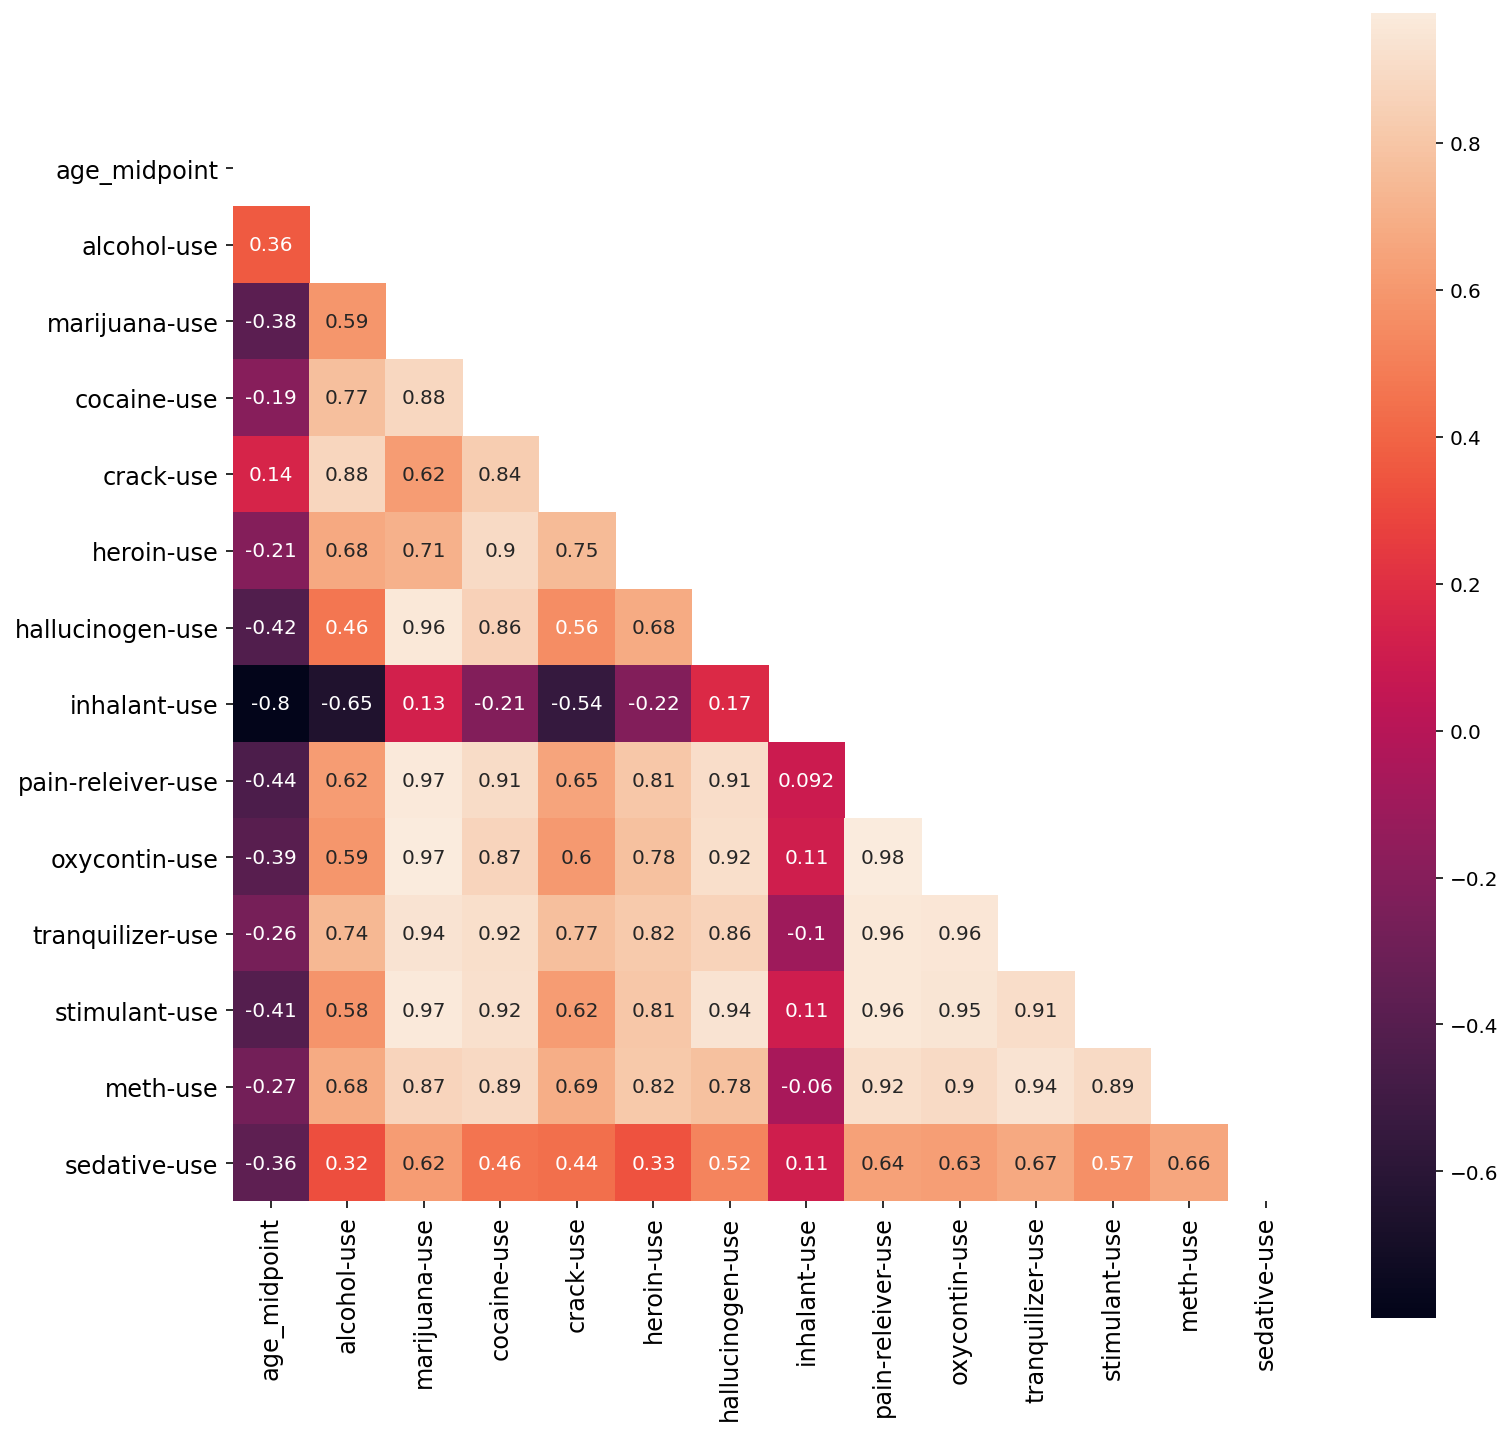

In [49]:
#alcohol and crack use are the only predictors with positive relationship with age
#most drugs seem to be related to each other positively, except inhalant use which seems to follow the inverse trend
def correlation_heat_map(df):
    corrs = df.corr()
    fig, ax = plt.subplots(figsize=(12, 12))
    mask = np.zeros_like(corrs, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    ax = sns.heatmap(corrs, mask=mask, annot=True, square = True)
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=12, rotation=90)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=12, rotation=0)
    ax.set_ylim([df.shape[1], 0])
    plt.show()
    return fig, ax

fig, ax = correlation_heat_map(drug_usage)

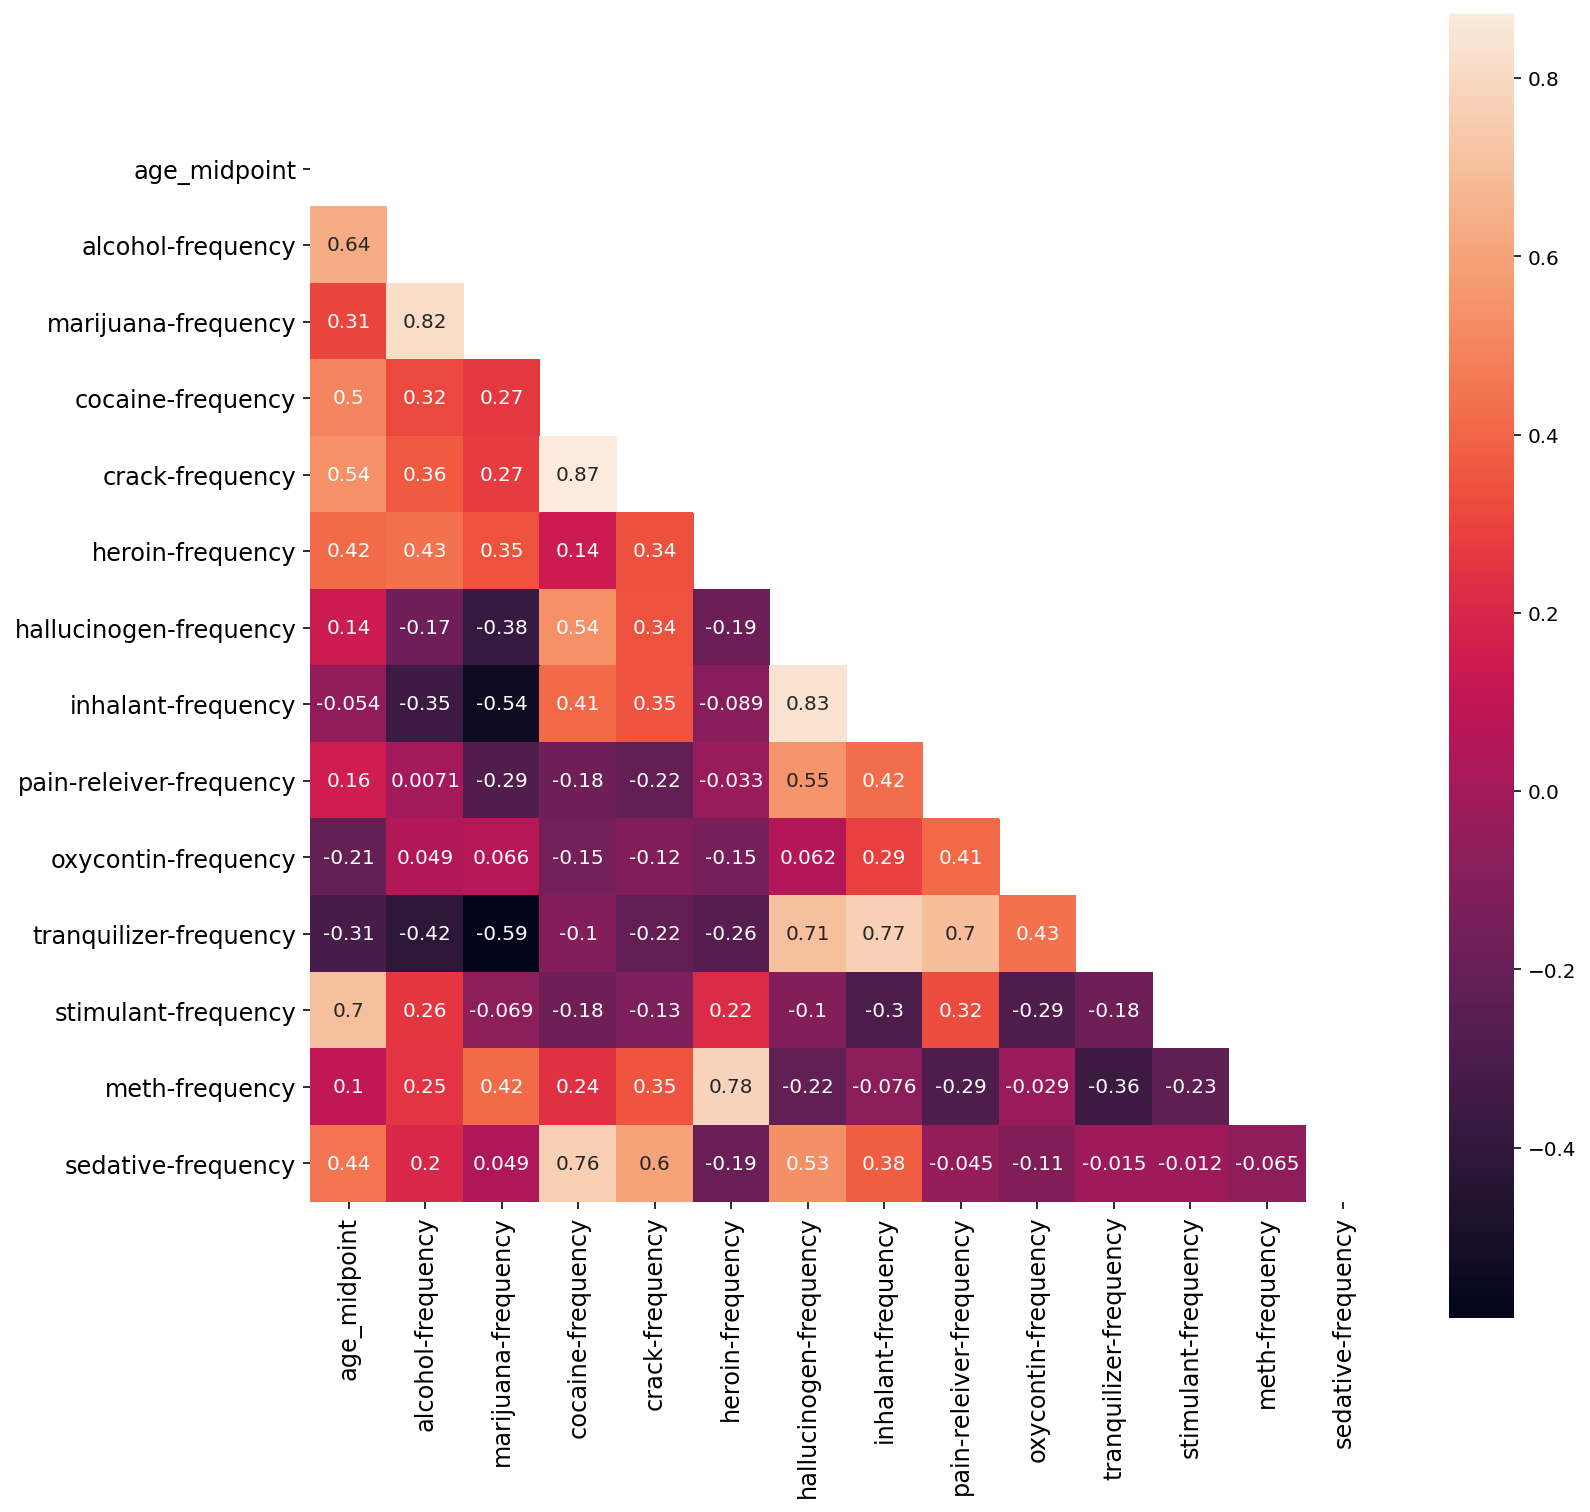

In [50]:
#it seems like while the % of users in age groups is negatively related to age, the median frequency increase as age increases
#in e.g.: cocaine, crack, heroin, stimulant, sedative
def correlation_heat_map(df):
    corrs = df.corr()
    fig, ax = plt.subplots(figsize=(12, 12))
    mask = np.zeros_like(corrs, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    ax = sns.heatmap(corrs, mask=mask, annot=True, square = True)
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=12, rotation=90)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=12, rotation=0)
    ax.set_ylim([df.shape[1], 0])
    plt.show()
    return fig, ax

fig, ax = correlation_heat_map(drug_frequency)

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

## Question and deliverables

Question: is the mean usage of marijuana in people aged between 12-20 different than the mean usage of marijuana in people aged 20+?

Null hypothesis: the mean marijuana use of people between 12-20 years old is equal the mean marijuana use of people 20+ years old

Deliverables: after conducting the test I will be able to determine if the mean usage of marijuana in people aged between 12-20 different than the mean usage of marijuana in people aged 20+

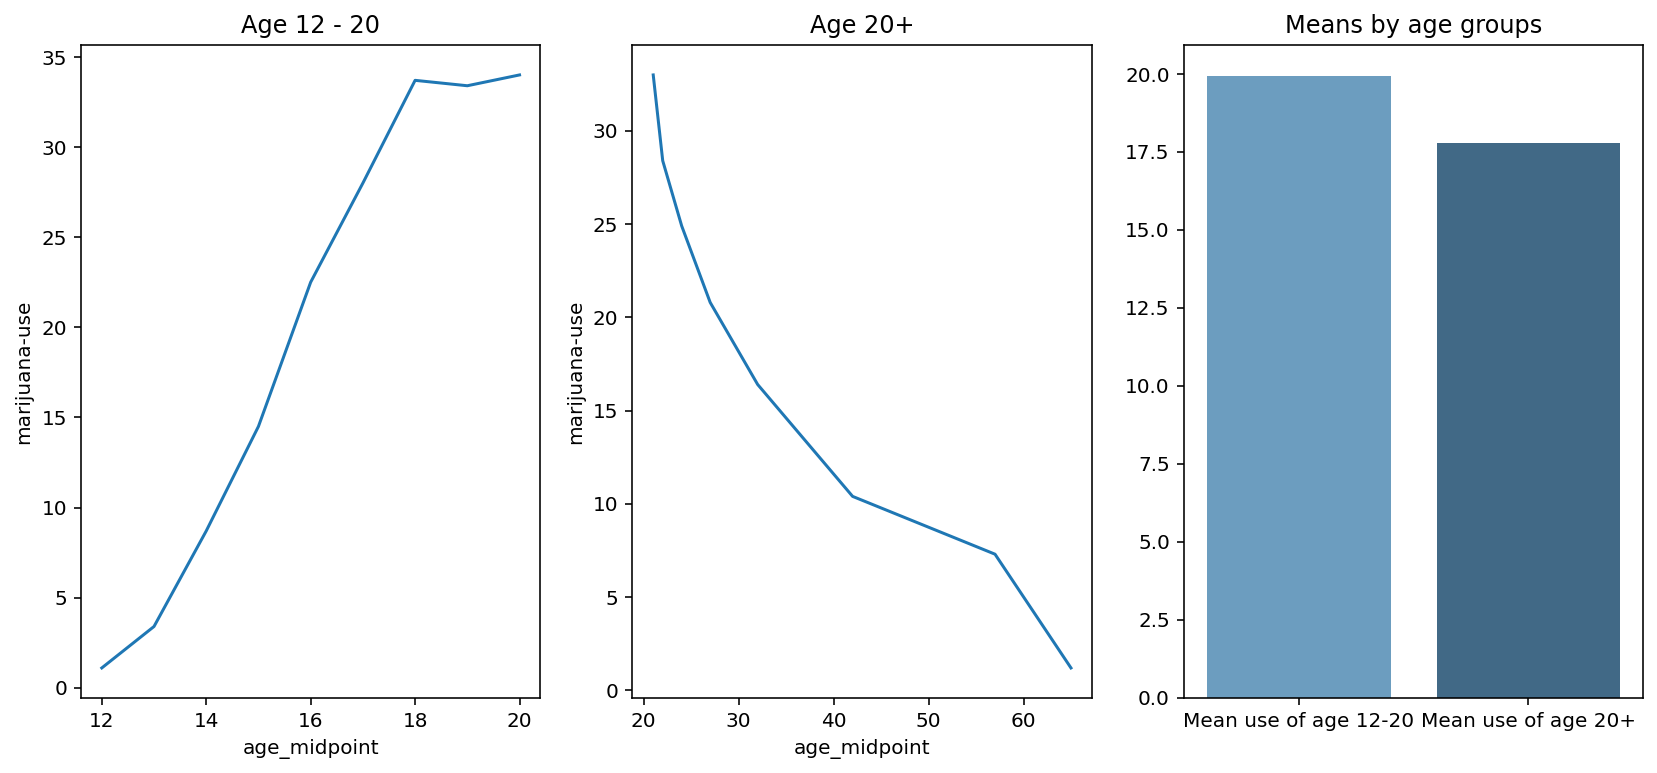

In [51]:
#plotting marijuana usage for the two groups and the respective means
mask_lower = (drug_usage.index >= 12) & (drug_usage.index <= 20)
lower_marijuana_use = drug_usage[mask_lower]['marijuana-use']

mask_upper = (drug_usage.index > 20)
upper_marijuana_use =drug_usage[mask_upper]['marijuana-use']
mean_dict = {'Mean us of age 12-20' : lower_marijuana_use.mean(),
             'Mean us of age 20+' :upper_marijuana_use.mean()}


fig, ax = plt.subplots(ncols = 3, nrows = 1,figsize =( 14,6))
sns.lineplot(x= lower_marijuana_use.index, y=lower_marijuana_use, ax = ax[0], palette = "Blues_d")
sns.lineplot(x=upper_marijuana_use.index, y=upper_marijuana_use, ax = ax[1], palette = "Blues_d")
sns.barplot(x= ['Mean use of age 12-20','Mean use of age 20+'], y = [lower_marijuana_use.mean(),upper_marijuana_use.mean()],  palette="Blues_d")
ax[0].set_title('Age 12 - 20')
ax[1].set_title('Age 20+')
ax[2].set_title('Means by age groups')
plt.show()

In [52]:
drug_usage

age_midpoint  alcohol-use  marijuana-use  cocaine-use  \
age_midpoint                                                          
12                      12          3.9            1.1          0.1   
13                      13          8.5            3.4          0.1   
14                      14         18.1            8.7          0.1   
15                      15         29.2           14.5          0.5   
16                      16         40.1           22.5          1.0   
17                      17         49.3           28.0          2.0   
18                      18         58.7           33.7          3.2   
19                      19         64.6           33.4          4.1   
20                      20         69.7           34.0          4.9   
21                      21         83.2           33.0          4.8   
22                      22         84.2           28.4          4.5   
24                      24         83.1           24.9          4.0   
27                      27         80.7           20.8          3.2   
32                      32         77.5           16.4          2.1   
42                      42         75.0           10.4          1.5   
57                      57         67.2            7.3          0.9   
65                      65         49.3            1.2          0.0   

              crack-use  heroin-use  hallucinogen-use  inhalant-use  \
age_midpoint                                                          
12                  0.0         0.1               0.2           1.6   
13                  0.0         0.0               0.6           2.5   
14                  0.0         0.1               1.6           2.6   
15                  0.1         0.2               2.1           2.5   
16                  0.0         0.1               3.4           3.0   
17                  0.1         0.1               4.8           2.0   
18                  0.4         0.4               7.0           1.8   
19                  0.5         0.5               8.6           1.4   
20                  0.6         0.9               7.4           1.5   
21                  0.5         0.6               6.3           1.4   
22                  0.5         1.1               5.2           1.0   
24                  0.5         0.7               4.5           0.8   
27                  0.4         0.6               3.2           0.6   
32                  0.5         0.4               1.8           0.4   
42                  0.5         0.1               0.6           0.3   
57                  0.4         0.1               0.3           0.2   
65                  0.0         0.0               0.1           0.0   

              pain-releiver-use  oxycontin-use  tranquilizer-use  \
age_midpoint                                                       
12                          2.0            0.1               0.2   
13                          2.4            0.1               0.3   
14                          3.9            0.4               0.9   
15                          5.5            0.8               2.0   
16                          6.2            1.1               2.4   
17                          8.5            1.4               3.5   
18                          9.2            1.7               4.9   
19                          9.4            1.5               4.2   
20                         10.0            1.7               5.4   
21                          9.0            1.3               3.9   
22                         10.0            1.7               4.4   
24                          9.0            1.3               4.3   
27                          8.3            1.2               4.2   
32                          5.9            0.9               3.6   
42                          4.2            0.3               1.9   
57                          2.5            0.4               1.4   
65                          0.6            0.0               0.2   

              stimula

In [53]:

from scipy.stats import sem
from scipy.stats import t

# function for calculating the t-test for two independent samples
def independent_ttest(data1, data2, alpha):
    
    # calculate means
    mean1, mean2 = np.mean(data1), np.mean(data2)
    # calculate standard errors
    se1, se2 = sem(data1), sem(data2)
    # standard error on the difference between the samples
    sed = np.sqrt(se1**2.0 + se2**2.0)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed
    # degrees of freedom
    degf = len(data1) + len(data2) - 2
    # calculate the critical value
    cv = t.ppf(1.0 - alpha, degf)
    # calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), degf)) * 2.0
    # return everything
    return t_stat, degf, cv, p
 
# calculate the t test
alpha = 0.05
#creating masks to select data from dataframe
mask_lower = (drug_usage.index >= 12) & (drug_usage.index <= 20)
mask_upper = (drug_usage.index > 20)
t_stat, degf, cv, p = independent_ttest(drug_usage[mask_lower]['marijuana-use'], drug_usage[mask_upper]['marijuana-use'], alpha)
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, degf, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
    print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
    print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

t=0.359, df=15, cv=1.753, p=0.724
Accept null hypothesis that the means are equal.
Accept null hypothesis that the means are equal.


**Report**



...

As per the bar plot above, the mean % usage of marijuana in the samples 12-20 years old and 20+ years old were similar. 
After a Student's t-test, we can confirm the null hypothesis that the mean of the two groups are equal, due to P score being higher than our confidence level (set at 5%).

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [54]:
df.head()

State  Rate  Verbal  Math  Difference
0    CT    82     509   510          -1
1    NJ    81     499   513         -14
2    MA    79     511   515          -4
3    NY    77     495   505         -10
4    NH    72     520   516           4

<function matplotlib.pyplot.show(close=None, block=None)>

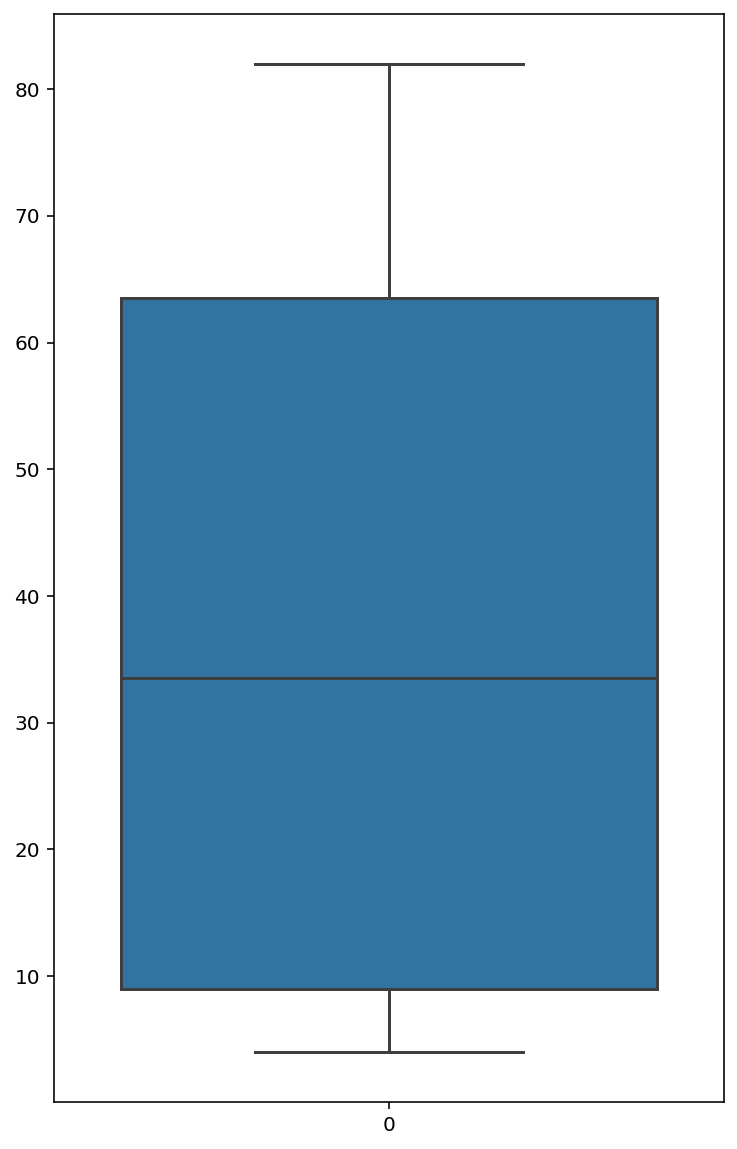

In [55]:
#outliers would show as datapoints outside the whiskers of a boxplot
#the whiskers of a boxplot include:
#- values within 1.5 times IQR below the 25th percentile (Q1)
#- values within 1.5 times IQR above the 75th percentile (Q3)
#in this case there are no outliers
rates = df.Rate
fig, ax = plt.subplots(figsize = (6,10))
sns.boxplot(data = rates, ax = ax)
plt.show

In [56]:
desc_stats = rates.describe()
desc_stats

count    52.000000
mean     37.153846
std      27.301788
min       4.000000
25%       9.000000
50%      33.500000
75%      63.500000
max      82.000000
Name: Rate, dtype: float64

In [57]:
#no outliers found
q1 = desc_stats[4]
q3 = desc_stats[6]
iqr = q3-q1
outliers = []
for row in rates:
    if row < q1-1.5*iqr or row > q3+1.5*iqr:
        outliers.append(row)
print(outliers)

[]


In [58]:
q1-1.5*iqr

-72.75

In [59]:
q3+1.5*iqr

145.25

In [60]:
iqr

54.5

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and Spearman rank correlation

---

### 9.1 Calculate the Spearman correlation of sat `Verbal` and `Math`

1. How does the Spearman correlation compare to the Pearson correlation? 
2. Describe clearly in words the process of calculating the Spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [61]:
df.corr(method='spearman')

Rate    Verbal      Math  Difference
Rate        1.000000 -0.833294 -0.813275   -0.014266
Verbal     -0.833294  1.000000  0.905205    0.060244
Math       -0.813275  0.905205  1.000000   -0.239883
Difference -0.014266  0.060244 -0.239883    1.000000

In [62]:
df.corr()

Rate    Verbal      Math  Difference
Rate        1.000000 -0.886432 -0.773746   -0.101412
Verbal     -0.886432  1.000000  0.899871    0.052600
Math       -0.773746  0.899871  1.000000   -0.388219
Difference -0.101412  0.052600 -0.388219    1.000000

In [63]:
#spearman correlation is used to evaluate the monotonic relationship between variables
#spearman uses the ordered position of the value in the dataset rather than the raw data
#the monotonic relationship is not linear

#Calculating the spearman's rank:
#- we take 2 datasets
#- rank the datasets by assigning the highest value rank 1, second highest rank 2 etc.
#- find 'd', as the difference between the ranks at same position and square them
#- find the sum of the squared d's
#- find spearman correlation coefficient with formula p = 1 - (6(sum of dsquared)/n(n**2 -1))

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

https://numpy.org/doc/stable/reference/generated/numpy.percentile.html?highlight=percentile#numpy.percentile

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the Spearman rank correlation?

In [64]:
#percentile is a way of ranking data by their position (max value gets 100 and the other values are ranked as a fraction of max)
from scipy import stats
perc=[round(stats.percentileofscore(df["Rate"],row),2) for row in df["Rate"]]

df["Percentile"]= perc
df[df["State"]=="CA"]


State  Rate  Verbal  Math  Difference  Percentile
23    CA    51     498   517         -19       56.73

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of converting raw scores to percentile.

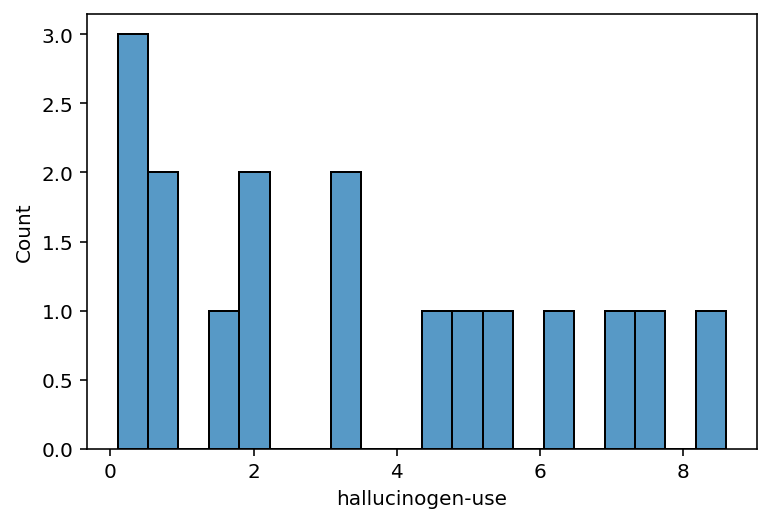

In [65]:
#1.because percentile scoring is used to find Q1,Q3 and IQR

#2. plotting hallucinogen use distribution
sns.histplot(drug_usage['hallucinogen-use'], bins = 20)
plt.show()

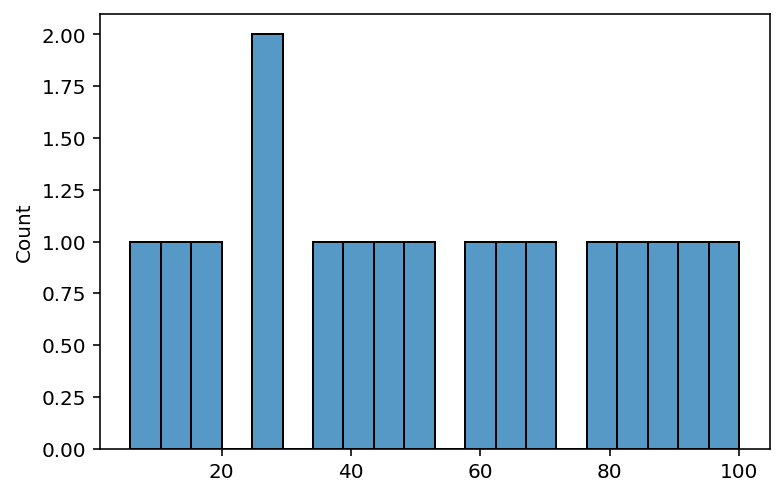

In [66]:
#3. percentile scored

percentile_hallucinogen=[round(stats.percentileofscore(drug_usage['hallucinogen-use'],row),2) for row in drug_usage['hallucinogen-use']]
sns.histplot(percentile_hallucinogen, bins = 20)
plt.show()

<ipython-input-67-d1b00d9f56b3>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



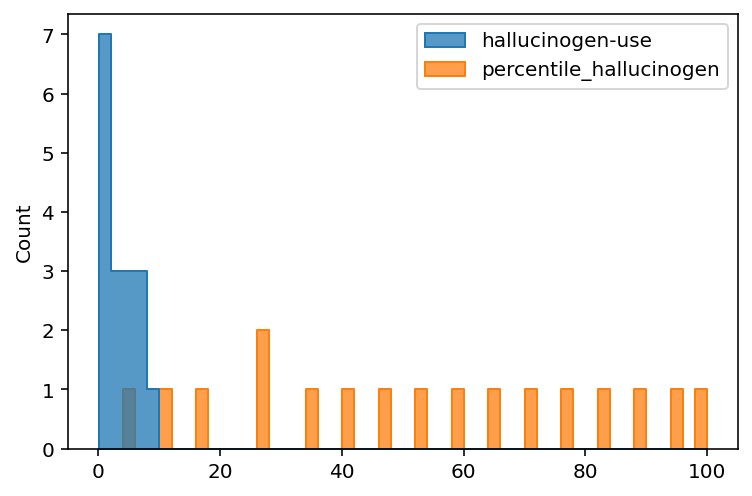

In [67]:
#4.raw scores vs percentile
drug_usage['percentile_hallucinogen'] = percentile_hallucinogen
sns.histplot(drug_usage[['hallucinogen-use','percentile_hallucinogen']], element="step", kde = False, bins = 50)
plt.show()